In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv(r'../data/garments_worker_productivity.csv')

In [73]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [74]:
data['no_of_style_change'] = data['no_of_style_change'].astype(str)
data['team'] = data['team'].astype(str)
data = data.replace(['finishing '], ['finishing']) 
data = data.replace(['sweing'], ['sewing']) 
data['wip'].fillna(0 ,inplace=True)
data['no_of_workers'] = data['no_of_workers'].apply(lambda x: int(x))

data.loc[data['targeted_productivity'] == 0.07, 'targeted_productivity'] = 0.7
data.loc[data['no_of_workers'] == 89, 'no_of_workers'] = 35

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   object 
 13  no_of_workers          1197 non-null   int64  
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [75]:
# # zero count in the numerical features
# # data['no_of_style_change'] = data['no_of_style_change'].astype(str)

# numerical = ['targeted_productivity', 'std_minute_value', 'work_in_progress', 'over_time', 'incentive', 'idle_time', 'idle_men',  'no_of_workers', 'actual_productivity']
# zero_count = [len(data[data['targeted_productivity'] == 0]),
#               len(data[data['std_minute_value'] == 0]),
#               len(data[data['work_in_progress'] == 0]), 
#               len(data[data['over_time'] == 0]), 
#               len(data[data['incentive'] == 0]), 
#               len(data[data['idle_time'] == 0]), 
#               len(data[data['idle_men'] == 0]), 
#               len(data[data['no_of_workers'] == 0]), 
#               len(data[data['actual_productivity'] == 0])]

# dict = {"numerical_feature": numerical, "zero_count": zero_count}
# zero_count_dataset = pd.DataFrame(dict)

# zero_count_dataset['zero_percentatge'] = zero_count_dataset['zero_count'] / len(data) * 100
# zero_count_dataset

In [76]:
data = data.drop(['date'], axis = 1)

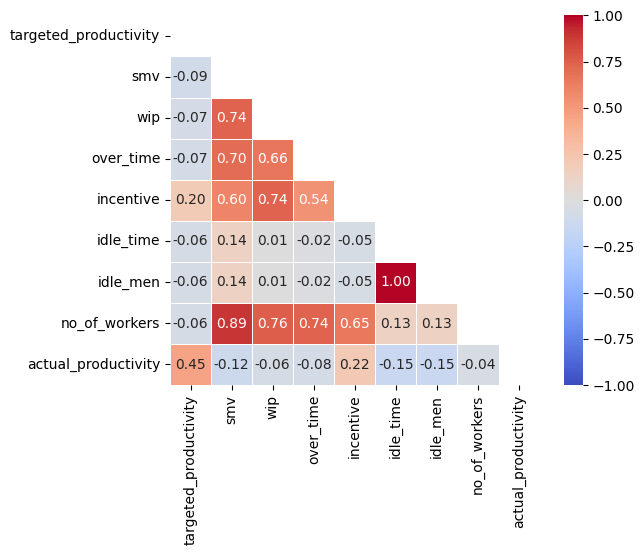

In [77]:
numerical = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical = [feature for feature in data.columns if data[feature].dtype == 'O']

mask = np.triu(np.ones_like(data[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(data[numerical].corr(method = 'spearman'),cmap = 'coolwarm', 
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f", 
                       square=True, linewidths = 0.5, mask = mask)
  
# displaying heatmap 
plt.show()

In [78]:
data.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   object 
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 131.0+ 

## Neural Network

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import TensorDataset, DataLoader

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   object 
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 131.0+ 

In [82]:
torch.manual_seed(42)

In [83]:
# categorical_cols = ['day', 'quarter', 'department', 'team']
# numerical_cols = ['no_of_workers', 'no_of_style_change','targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men']

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False)
categorical_data = encoder.fit_transform(data[categorical])

# Scale numerical columns
scaler = MinMaxScaler()
numerical_data = scaler.fit_transform(data[numerical])

# Combine encoded categorical and scaled numerical data
X = np.concatenate([categorical_data, numerical_data], axis=1)
y = data['actual_productivity']

# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 


In [84]:
X[1]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.88888889, 0.02013163,
       0.        , 0.03703704, 0.        , 0.        , 0.        ,
       0.10344828, 0.73618016])

In [85]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [86]:
X_train.shape[1]

37

In [87]:
class GarmentProductivityModel(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)  
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.dropout2 = nn.Dropout(0.2)  
        self.fc3 = nn.Linear(hidden_size_2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Hyperparameters
input_size = X_train.shape[1]   # 37
hidden_size_1 = 64
hidden_size_2 = 32
output_size = 1
learning_rate = 0.001
num_epochs = 50

# Create model instance
model = GarmentProductivityModel(input_size, hidden_size_1, hidden_size_2, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [88]:
train_losses = []
val_losses = []
test_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)

        # Reshape labels to match the output shape
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    # Print or log the average training and validation loss for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

#Test
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print(f"Test Loss: {test_loss:.4f}")


Epoch [1/50], Train Loss: 0.1790, Val Loss: 0.0490
Epoch [2/50], Train Loss: 0.0435, Val Loss: 0.0429
Epoch [3/50], Train Loss: 0.0325, Val Loss: 0.0447
Epoch [4/50], Train Loss: 0.0295, Val Loss: 0.0443
Epoch [5/50], Train Loss: 0.0254, Val Loss: 0.0459
Epoch [6/50], Train Loss: 0.0212, Val Loss: 0.0471
Epoch [7/50], Train Loss: 0.0186, Val Loss: 0.0460
Epoch [8/50], Train Loss: 0.0170, Val Loss: 0.0483
Epoch [9/50], Train Loss: 0.0148, Val Loss: 0.0510
Epoch [10/50], Train Loss: 0.0143, Val Loss: 0.0556
Epoch [11/50], Train Loss: 0.0139, Val Loss: 0.0514
Epoch [12/50], Train Loss: 0.0119, Val Loss: 0.0542
Epoch [13/50], Train Loss: 0.0121, Val Loss: 0.0486
Epoch [14/50], Train Loss: 0.0110, Val Loss: 0.0527
Epoch [15/50], Train Loss: 0.0098, Val Loss: 0.0501
Epoch [16/50], Train Loss: 0.0111, Val Loss: 0.0478
Epoch [17/50], Train Loss: 0.0108, Val Loss: 0.0508
Epoch [18/50], Train Loss: 0.0092, Val Loss: 0.0498
Epoch [19/50], Train Loss: 0.0090, Val Loss: 0.0485
Epoch [20/50], Train 

In [89]:
with torch.no_grad():
    test_loss = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, labels).item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print(f"Test Loss: {test_loss:.4f}")


Test Loss: 0.0565


In [90]:
# Make predictions on the test set
y_pred = model(X_test_tensor).squeeze(1)

# Calculate RMSE and MAE
def rmse(y_true, y_pred):
  return torch.sqrt(torch.mean((y_true - y_pred) ** 2))

def mae(y_true, y_pred):
  return torch.mean(torch.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
  mean_y_true = torch.mean(y_true)
  ss_tot = torch.sum((y_true - mean_y_true) ** 2)
  ss_res = torch.sum((y_true - y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2.item()

rmse_val = rmse(y_test_tensor, y_pred)
mae_val = mae(y_test_tensor, y_pred)
r2_val = r2_score(y_test_tensor, y_pred)

print("RMSE:", rmse_val.item())
print("MAE:", mae_val.item())
print("R-squared:", r2_val)

RMSE: 0.057006947696208954
MAE: 0.04407535493373871
R-squared: 0.8858765363693237


In [91]:
y_test_tensor.shape

torch.Size([120])

In [92]:
y_pred

tensor([0.8169, 0.7710, 0.6726, 0.8274, 0.7648, 0.8266, 1.0388, 0.7218, 0.7872,
        0.7216, 0.7514, 0.3649, 0.6349, 0.6587, 1.0499, 0.4921, 0.4066, 0.9101,
        0.7928, 0.7372, 0.8754, 0.7614, 0.7310, 0.9742, 0.8182, 0.8721, 0.6618,
        0.9227, 0.9782, 0.5238, 0.8300, 0.6517, 0.4713, 0.6055, 0.6603, 0.5080,
        0.6772, 0.5086, 0.8098, 0.7922, 0.9746, 0.7709, 0.9262, 1.0476, 0.7895,
        0.8216, 0.7091, 0.7769, 0.7611, 0.6800, 0.3136, 0.7209, 0.3836, 0.7923,
        0.7464, 0.6797, 0.5908, 0.8935, 0.7302, 0.4371, 0.7148, 0.8376, 0.5369,
        0.9546, 0.7996, 0.4865, 0.7535, 0.7994, 0.7944, 0.8459, 0.5339, 0.9832,
        0.5318, 0.7206, 0.5193, 0.7894, 0.8113, 0.3635, 0.8477, 0.8266, 0.9301,
        0.4314, 0.5813, 0.7057, 0.8207, 0.7720, 0.9092, 0.6176, 0.4670, 0.6318,
        0.4442, 0.3486, 0.5299, 0.8423, 0.6270, 0.6742, 0.6832, 0.7623, 0.7595,
        0.3390, 0.8937, 0.8383, 0.9565, 0.9807, 0.8132, 0.7048, 0.6891, 0.3924,
        0.7384, 0.6382, 0.4321, 0.7539, 

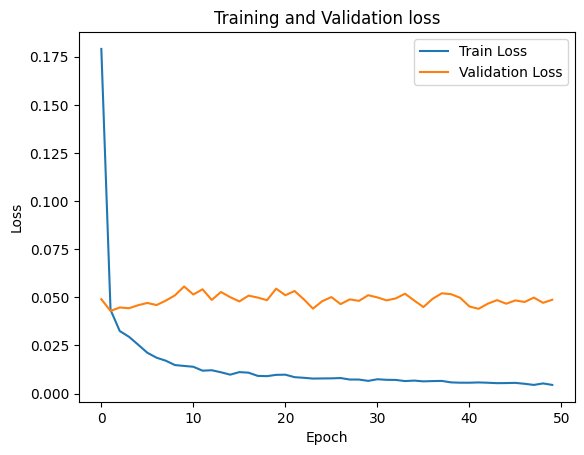

In [93]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
# plt.plot(test_loss, label='Test Loss')  # Plot test loss as a point
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

### Save the Model

In [94]:
torch.save(model.state_dict(), '../nn_model/garment_nn_model_1.pt')

### Load the model

In [95]:
# Load the Saved Model
load_model = GarmentProductivityModel(input_size, hidden_size_1, hidden_size_2, output_size)
load_model.load_state_dict(torch.load('../nn_model/garment_nn_model_1.pt'))

<All keys matched successfully>

In [96]:
# Make sure it loaded correctly
load_model.eval()

GarmentProductivityModel(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (relu): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

In [97]:
# Quarter1, sewing, Thursday, 0.80, 26.16, 1108.0, 7080.0, 98.000000, 0.0, 0, 0, 59        # 0.940725

In [98]:
new_data = torch.tensor(X[0], dtype=torch.float32)

In [99]:
with torch.no_grad():
    predicted_productivity = load_model(new_data)

print("Predicted productivity:", predicted_productivity.item())

Predicted productivity: 0.9154400825500488
